# Rt Live Model

In [12]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_il_other, get_and_process_covidtracking_data_il_contact, summarize_inference_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fetch data and select the state's data

In [13]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))
df_other = get_and_process_covidtracking_data_il_other(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))
df_contact = get_and_process_covidtracking_data_il_contact(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))


In [14]:
region = "Israel"
model_data = df.loc[region]
model_data_other = df_other.loc[region]
model_data_contact = df_contact.loc[region]

## Create the model instance and sample

In [15]:
gm = GenerativeModel(region, model_data)
gm.sample()
gm_other = GenerativeModel(region, model_data_other)
gm_other.sample()
gm_contact = GenerativeModel(region, model_data_contact)
gm_contact.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2503 seconds.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2487 seconds.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2492 seconds.


## Summarize Model Output

In [16]:
result = summarize_inference_data(gm.inference_data)
result_other = summarize_inference_data(gm_other.inference_data)
result_contact = summarize_inference_data(gm_contact.inference_data)

In [17]:
result.tail(21)

result_contact.tail(21)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-06-29,1.022757,1.019416,0.917580,1.116061,221.191297,240.571218,241.132403,416.0,455
2020-06-30,1.024807,1.024417,0.920696,1.126131,222.101196,242.149666,239.712692,439.0,483
2020-07-01,1.024209,1.029353,0.922608,1.136341,223.052837,243.644184,230.963287,451.0,515
2020-07-02,1.025005,1.026371,0.884495,1.120433,224.089496,245.067204,235.364575,506.0,567
2020-07-03,1.024377,1.021852,0.895732,1.139639,225.188251,246.430518,244.473028,368.0,397
2020-07-04,1.025043,1.026654,0.902839,1.162548,226.331464,247.746084,226.815166,172.0,200
2020-07-05,1.025717,1.021903,0.889276,1.163892,227.509224,249.022577,238.456437,415.0,459
2020-07-06,1.027199,1.025445,0.893181,1.186904,228.742990,250.266614,241.652085,558.0,609
2020-07-07,1.028572,1.025551,0.888853,1.190424,230.078159,251.486687,245.213491,503.0,541


## Plot Model Output

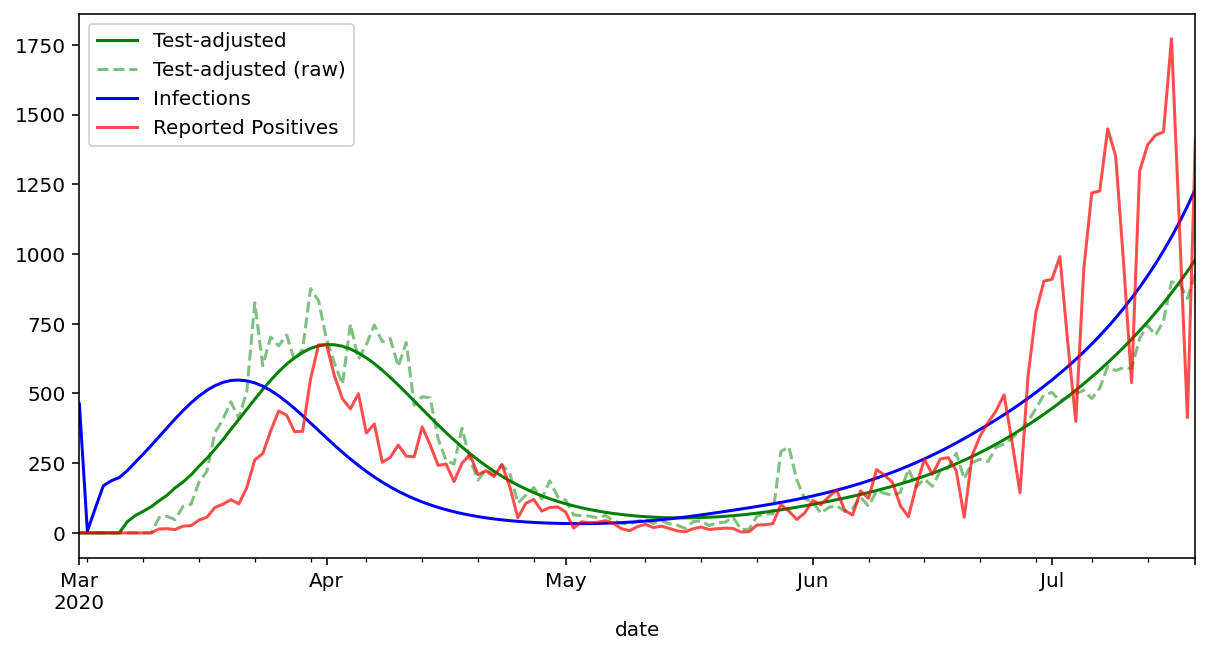

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

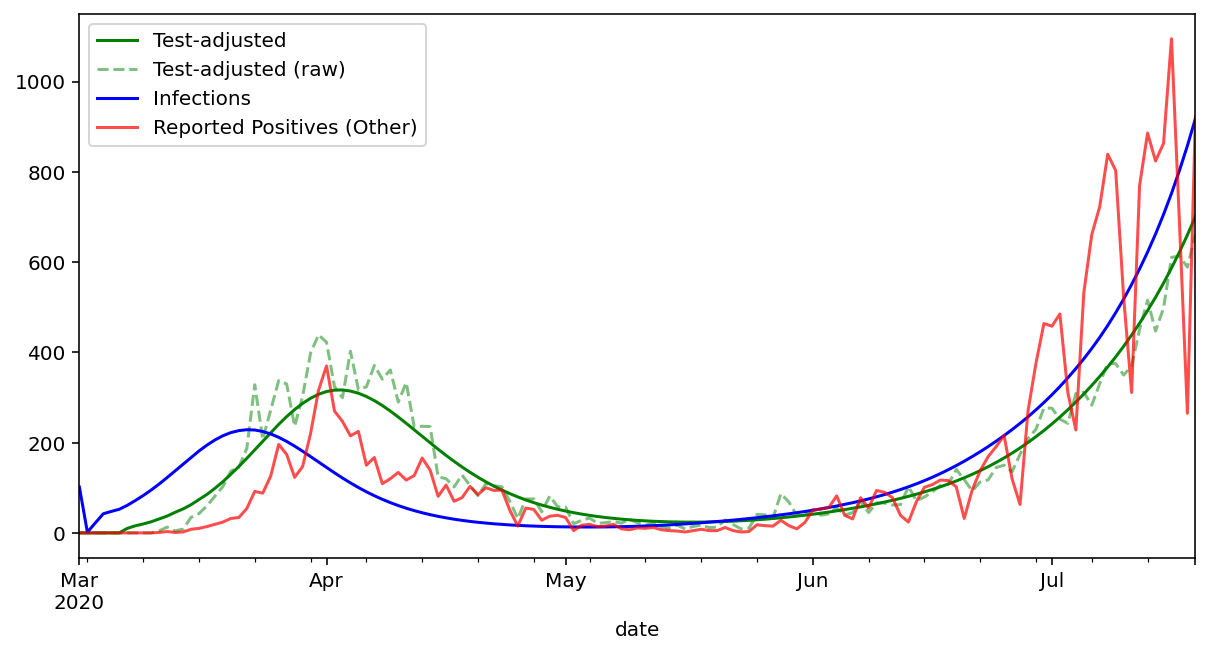

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
result_other.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result_other.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result_other.infections.plot(c="b", label="Infections")
gm_other.observed.positive.plot(c='r', alpha=.7, label="Reported Positives (Other)")
fig.set_facecolor('w')
ax.legend();

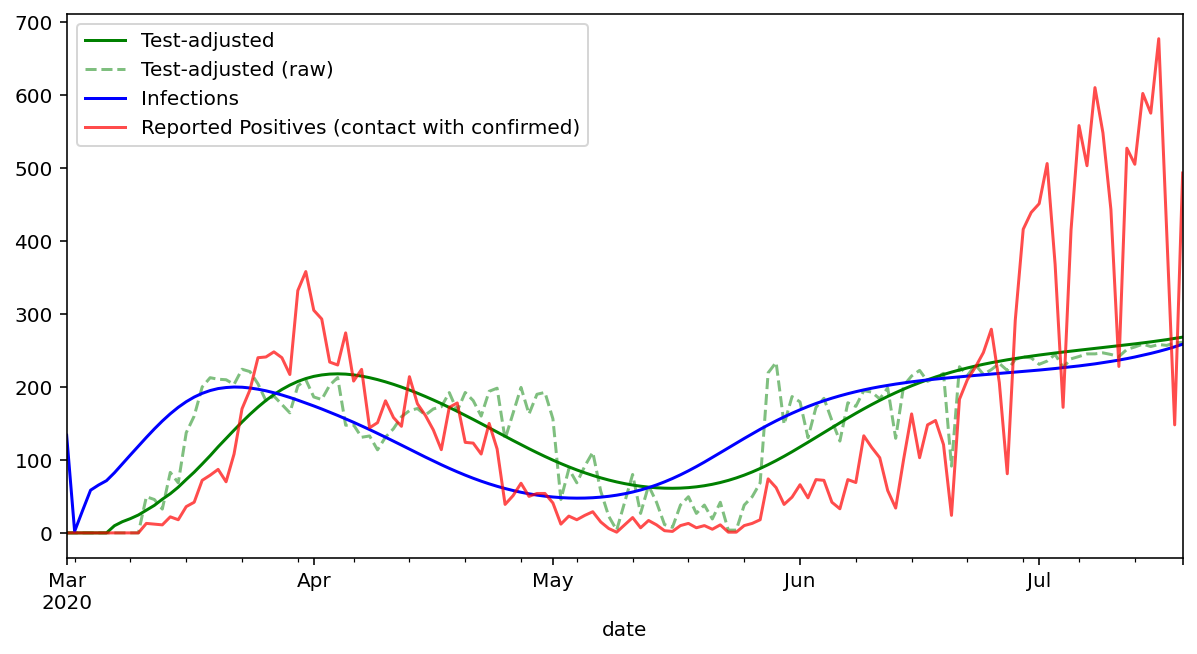

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
result_contact.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result_contact.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result_contact.infections.plot(c="b", label="Infections")
gm_contact.observed.positive.plot(c='r', alpha=.7, label="Reported Positives (contact with confirmed)")
fig.set_facecolor('w')
ax.legend();

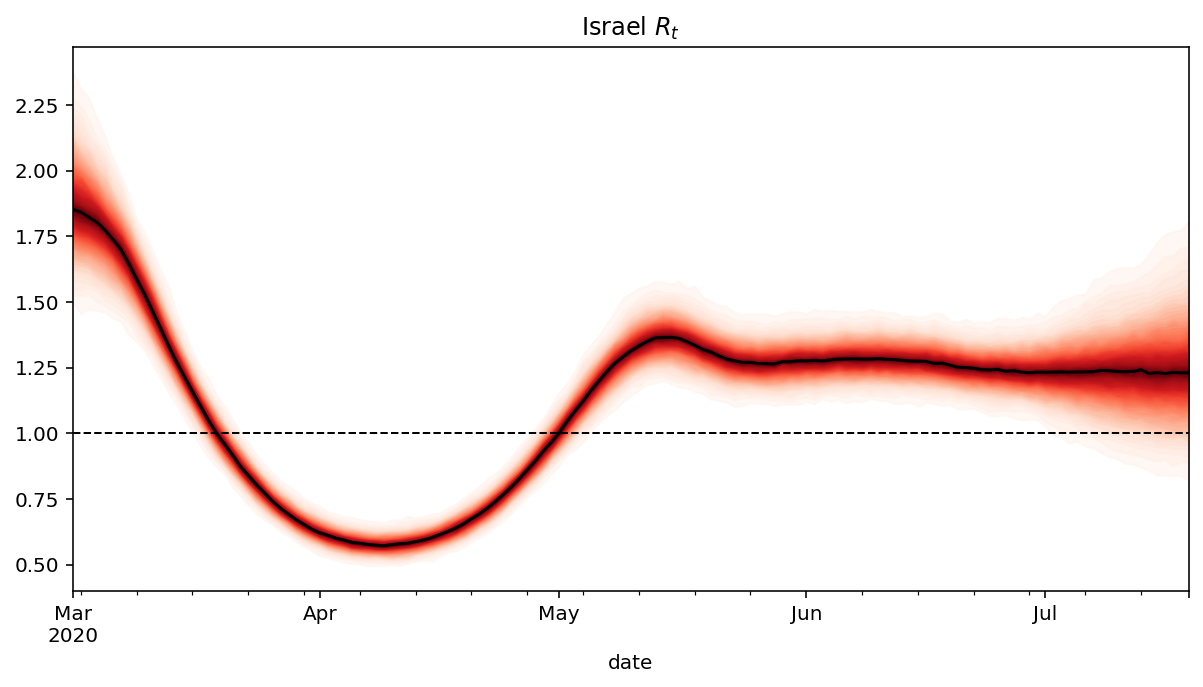

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

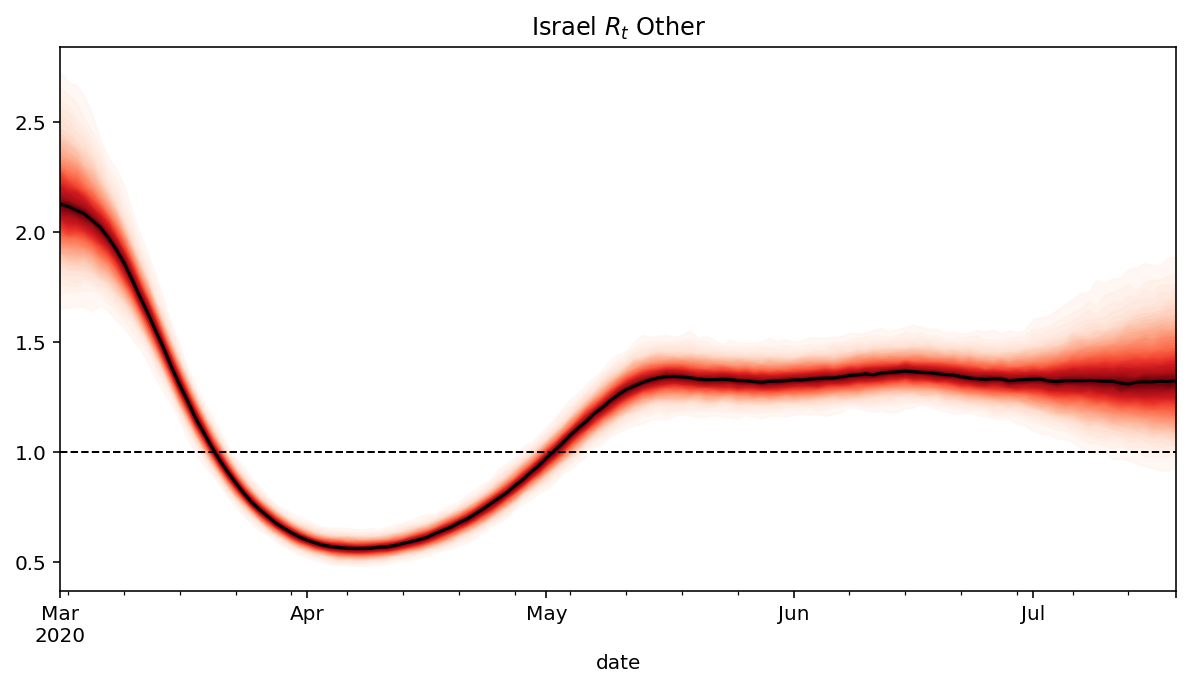

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ Other")
samples = gm_other.trace['r_t']
x=result_other.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result_other["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

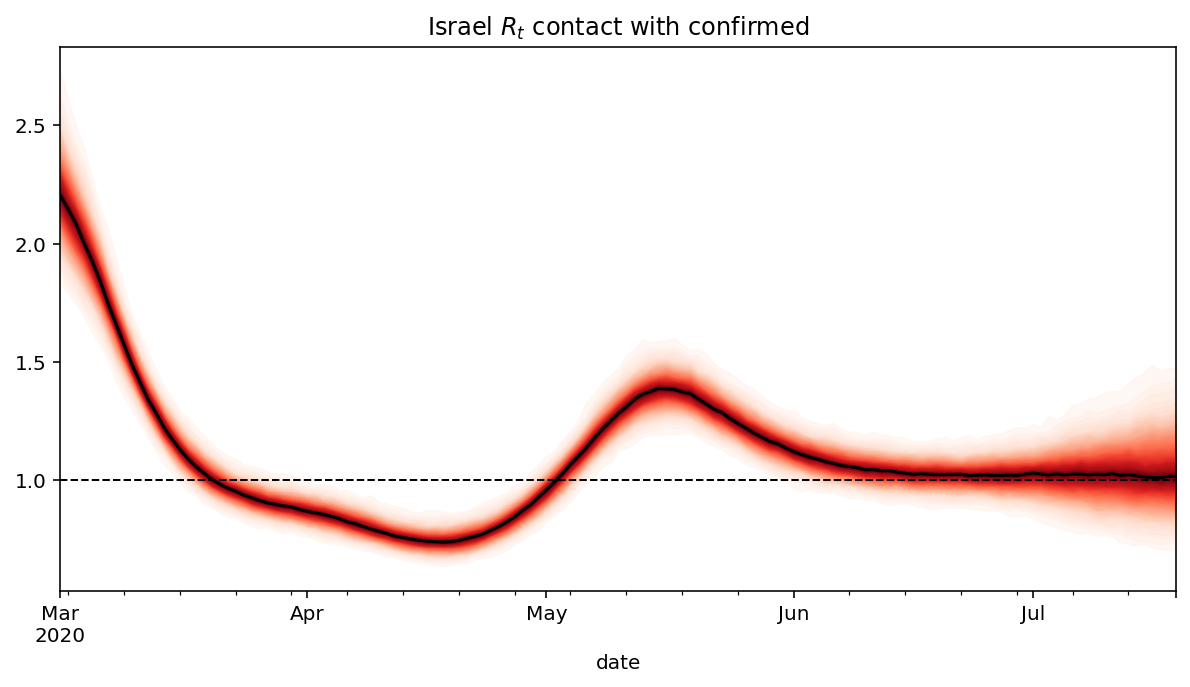

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ contact with confirmed")
samples = gm_contact.trace['r_t']
x=result_contact.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result_contact["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

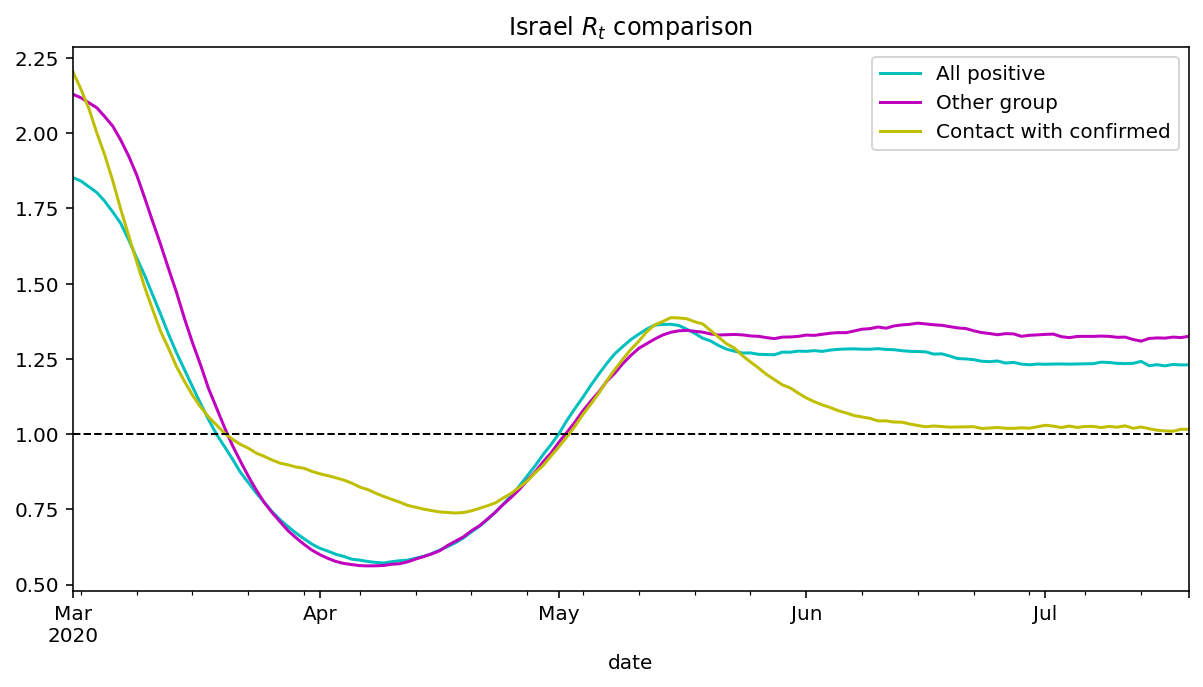

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ comparison")
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))

result["median"].plot(c="c", ls='-', label="All positive")
result_other["median"].plot(c="m", ls='-', label="Other group")
result_contact["median"].plot(c="y", ls='-', label="Contact with confirmed")

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')
ax.legend()

In [26]:
result_other.tail(21)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-06-29,1.331785,1.328261,1.229210,1.455070,272.636527,213.215597,229.698375,376.0,15587
2020-06-30,1.331395,1.329933,1.208906,1.454177,288.888569,226.894575,276.572966,464.0,15975
2020-07-01,1.331859,1.331362,1.196981,1.452128,306.068117,241.370797,276.335100,458.0,15782
2020-07-02,1.330643,1.332250,1.187998,1.460371,324.279783,256.668477,252.003556,485.0,18326
2020-07-03,1.328456,1.323706,1.164489,1.455519,343.600523,272.814482,242.715535,311.0,12201
2020-07-04,1.328474,1.320552,1.150036,1.457426,364.070052,289.842542,308.605284,228.0,7035
2020-07-05,1.331026,1.324529,1.157013,1.485759,385.704446,307.797399,311.547094,532.0,16260
2020-07-06,1.335065,1.324753,1.129011,1.482164,408.640953,326.729318,282.855756,661.0,22252
2020-07-07,1.334725,1.324605,1.142494,1.519004,433.158521,346.695399,331.000352,723.0,20799
